# 線形回帰スクラッチ

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [2]:
class ScratchLinearRegression():
    """
    線形回帰のスクラッチ実装

    Parameters
    ----------
    num_iter : int
      イテレーション数
    lr : float
      学習率
    no_bias : bool
      バイアス項を入れない場合はTrue
    verbose : bool
      学習過程を出力する場合はTrue

    Attributes
    ----------
    self.coef_ : 次の形のndarray, shape (n_features,)
      パラメータ
    self.loss : 次の形のndarray, shape (self.iter,)
      学習用データに対する損失の記録
    self.val_loss : 次の形のndarray, shape (self.iter,)
      検証用データに対する損失の記録

    """

    def __init__(self, num_iter = 100, lr = 0.01, bias = True, verbose = False):
        # ハイパーパラメータを属性として記録
        self.iter = num_iter
        self.lr = lr
        self.bias = bias
        self.verbose = verbose
        # 損失を記録する配列を用意
        self.loss = np.zeros(self.iter)
        self.val_loss = np.zeros(self.iter)
        
    def _linear_hypothesis(self, X):
        """
        線形の仮定関数を計算する

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
          学習データ

        Returns
        -------
          次の形のndarray, shape (n_samples, 1)
          線形の仮定関数による推定結果

        """
        h = X@self.coef_
        # （サンプル数,1）　＝ (サンプル数, 特徴量数)＠（特徴量数,）　
        return h
    
    def _gradient_descent(self, X, y):
        """
        最急降下法で１回学習する
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
          学習データ

        Returns
        -------
        self.coef_ : (特徴量数,)
        
        """
        m = X.shape[0]
        self.coef_ = self.coef_ - self.lr * np.average((self._linear_hypothesis(X) - y )*X.T, axis=1)
        #（特徴量数,）　　＝　(特徴量数,)　ー　学習率*平均(（サンプル数,）* (サンプル数,特徴量数).T) 
                                                            #学習率*(特徴量数,)/サンプル数
        return self.coef_

    def MSE(self,y_pred, y):
        """
        平均二乗誤差の計算

        Parameters
        ----------
        y_pred : 次の形のndarray, shape (n_samples,)
          推定した値
        y : 次の形のndarray, shape (n_samples,)
          正解値

        Returns
        ----------
        mse : numpy.float
          平均二乗誤差
        """
        mse = np.average((y_pred - y)**2) 

        return mse


    def fit(self, X, y, X_val=None, y_val=None):
        """
        線形回帰を学習する。検証用データが入力された場合はそれに対する損失と精度もイテレーションごとに計算する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            学習用データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            学習用データの正解値
        X_val : 次の形のndarray, shape (n_samples, n_features)
            検証用データの特徴量
        y_val : 次の形のndarray, shape (n_samples, )
            検証用データの正解値
        """
        exist_valdata = False
        if X_val is not None:
            exist_valdata = True
        
        #バイアス項の存在
        if self.bias == True:
            X = np.concatenate([np.ones(X.shape[0]).reshape(-1,1),X], axis = 1)
            if exist_valdata:
                X_val = np.concatenate([np.ones(X_val.shape[0]).reshape(-1,1),X_val], axis = 1)
                
        #バイアス項の存在に依存した、thetaの形
        self.coef_ = np.random.rand(X.shape[1])
        
        for i in range(self.iter):
            self._gradient_descent(X, y)#self._linear_hypothesis(X) - y)
            self.loss[i] = self.MSE(self._linear_hypothesis(X),  y) / 2
            if exist_valdata:
                self.val_loss[i] = self.MSE(self._linear_hypothesis(X_val),  y_val) / 2
                
        if self.verbose:
            #verboseをTrueにした際は学習過程を出力
                print("train data:", self.loss)
                print("val data:", self.val_loss)


    def predict(self, X):
        """
        線形回帰を使い推定する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル

        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            線形回帰による推定結果
        """
        X_shape0 = X.shape[0]
        if self.bias == True:
            X = np.concatenate([np.ones(X_shape0).reshape(-1,1),X], axis = 1)

        return _linear_hypothesis(X)# （サンプル数,1)

## 【問題1】仮定関数


## 【問題2】最急降下法


## 【問題3】推定


## 【問題4】平均二乗誤差


## 【問題5】目的関数


# 検証

## 【問題6】学習と推定

In [4]:
house_price = pd.read_csv("train2.csv")
X = np.array(house_price[["GrLivArea", "YearBuilt"]])
y = np.array(house_price["SalePrice"])

In [5]:
SSx = StandardScaler()
SSx.fit(X)
X_transform = SSx.transform(X)

SSy = StandardScaler()
SSy.fit(y.reshape(-1,1))
y_transform = SSy.transform(y.reshape(-1,1)).reshape(-1)

/Users/takamoriyuki/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_transform, y_transform, test_size=0.2, random_state=0)

In [8]:
slr = ScratchLinearRegression()
slr.fit(X_train, y_train, X_val=X_test,y_val= y_test)

## 【問題7】学習曲線のプロット

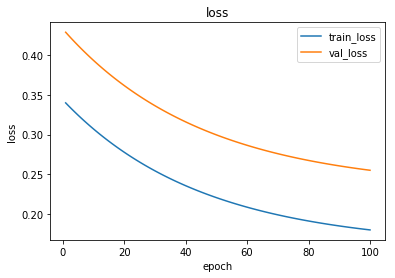

In [9]:
plt.title("loss")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.plot(np.arange(1, 101), slr.loss, label="train_loss")
plt.plot(np.arange(1, 101), slr.val_loss, label="val_loss")
plt.legend()
plt.show()